In [ ]:
# USED FOR TESTING OUTPUT NPY FILES

In [ ]:
# Check for file and basic shapes
import numpy as np, os
import pandas as pd

CSV_PATH = './data/MobiAct_Dataset_v2.0/MobiAct_Dataset_v2.0/Annotated Data/FOL/FOL_1_1_annotated.csv' 
OUT_DIR = './output_data/MobiAct'
for name in ['windows.npy', 'labels.npy', 
             'train_windows.npy', 'val_windows.npy', 'test_windows.npy']:
    path = os.path.join(OUT_DIR, name)
    if os.path.exists(path):
        arr = np.load(path)
        print(f"{name}: shape = {arr.shape}")
    else:
        print(f"{name}: not found")

windows.npy: shape = (11394, 120, 7)
labels.npy: shape = (11394,)
train_windows.npy: shape = (9115, 120, 7)
val_windows.npy: shape = (1139, 120, 7)
test_windows.npy: shape = (1140, 120, 7)


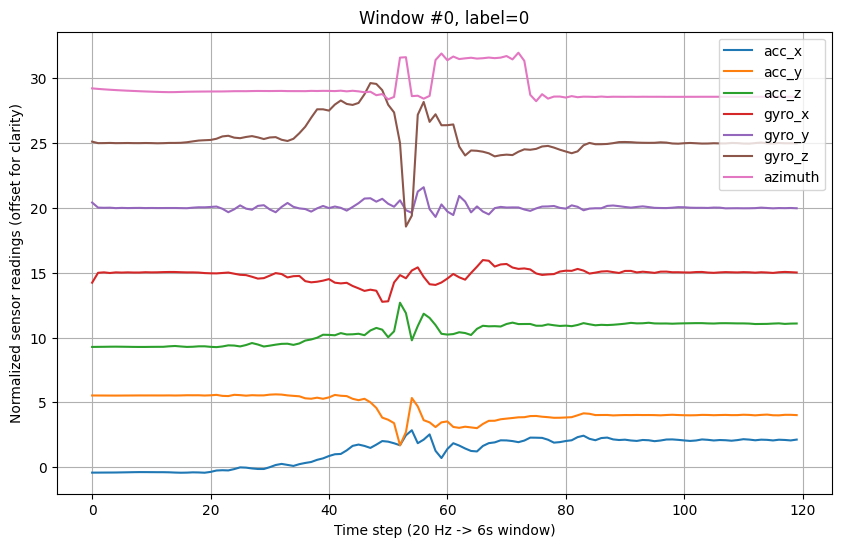

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

OUT_DIR = r"./output_data/MobiAct"

windows = np.load(os.path.join(OUT_DIR, 'windows.npy'))
labels = np.load(os.path.join(OUT_DIR, 'labels.npy'))

# Load feature names from norm_stats.json
stats_path = os.path.join(OUT_DIR, "norm_stats.json")
if os.path.exists(stats_path):
    with open(stats_path, "r") as f:
        stats = json.load(f)
        channel_names = stats.get("feature_cols", [f"ch{i}" for i in range(windows.shape[2])])
else:
    channel_names = ["acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z","azimuth"]

# choose sample, i = n
i = 0
sample = windows[i]
label = labels[i]

plt.figure(figsize=(10,6))
for ch in range(sample.shape[1]):
    plt.plot(sample[:, ch] + ch*5, label=channel_names[ch])

plt.title(f"Window #{i}, label={label}")
plt.xlabel("Time step (20 Hz -> 6s window)")
plt.ylabel("Normalized sensor readings (offset for clarity)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Use to confirm if normalization worked. The mean should be ~0 and std ~1 per channel
import json
stats_path = os.path.join(OUT_DIR, 'norm_stats.json')
with open(stats_path) as f:
    stats = json.load(f)

print("Normalization means:", stats['mean'])
print("Normalization stds:", stats['std'])

win = np.load(os.path.join(OUT_DIR, 'windows.npy'))
print("Empirical mean/std per channel:")
print(win.mean(axis=(0,1)), win.std(axis=(0,1)))

Normalization means: [0.22140906241450975, 5.882740490764901, 0.7034755108036645, -0.02892559325271699, -0.004357751272143645, 0.013581516738418195, 177.08765676758952]
Normalization stds: [3.883501602455844, 7.027475864646927, 3.848425947323117, 1.057753555639259, 1.0060204571018008, 0.6818279477679889, 107.54372312583314]
Empirical mean/std per channel:
[-0.01355193  0.0542986  -0.06185922 -0.00055516  0.00107014  0.00346766
  0.00659996] [0.96730647 1.01453936 0.89663542 1.04303388 1.04240735 1.03118937
 0.99893453]


In [ ]:
unique, counts = np.unique(labels, return_counts=True)
print("Labels distribution:", dict(zip(unique, counts)))
print("Label map:", stats.get('label_map'))

Labels distribution: {np.int64(0): np.int64(107), np.int64(1): np.int64(1), np.int64(2): np.int64(70), np.int64(3): np.int64(59), np.int64(4): np.int64(45), np.int64(5): np.int64(28), np.int64(6): np.int64(823), np.int64(7): np.int64(780), np.int64(8): np.int64(537), np.int64(9): np.int64(9), np.int64(10): np.int64(51), np.int64(11): np.int64(598), np.int64(12): np.int64(3342), np.int64(13): np.int64(444), np.int64(14): np.int64(452), np.int64(15): np.int64(4048)}
Label map: {'BSC': 0, 'CHU': 1, 'CSI': 2, 'CSO': 3, 'FKL': 4, 'FOL': 5, 'JOG': 6, 'JUM': 7, 'LYI': 8, 'SCH': 9, 'SDL': 10, 'SIT': 11, 'STD': 12, 'STN': 13, 'STU': 14, 'WAL': 15}
